In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

- For simple plotting, the pyplot module provides a MATLAB-like interface.
- The plot() command displays the graph and there are a couple of options. (kind='line', 'bar', 'barh', 'pie' etc.)
- By default, the graph is a line plot, but you can also specify that you want to use another type of graph such as a barh graph or a pie chart.
- Half of the skill is in trying to determine which graph would be the best to represent the data.
- So, you'd normally use a line graph when you're trying to track changes of a short or a long period of time.
- When smaller changers exist, line graphs are better to use than, say, a bar graph and line graphs can also be used to compare changes of the same period of time for more than one group.
- A bar graph or a horizontal bar graph have the same use cases.
- Bar graphs are used to compare things between different groups or to track changes over time. However, when trying to measure change over time, bar graphs are best when the changes are large.
- Pie charts are best to use when you're trying to compare parts of a whole. They do not show changes over time.

In [2]:
oo = pd.read_csv('data/olympics.csv', skiprows=4)
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


### Plot Types
#### What were the different sports in the first olympics? Plot them using different graphs

In [3]:
fo = oo[oo.Edition == 1896]
fo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


#### Line Plot

In [4]:
fo.Sport.value_counts()

Gymnastics       45
Athletics        37
Cycling          16
Shooting         15
Aquatics         11
Tennis           10
Fencing           8
Weightlifting     6
Wrestling         3
Name: Sport, dtype: int64

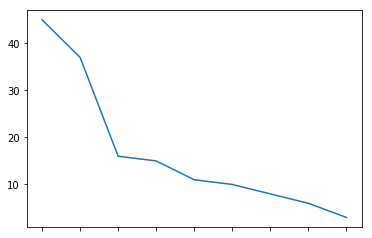

In [5]:
# we can chain a plot command to value_counts and by deault we will get a line plot
fo.Sport.value_counts().plot()

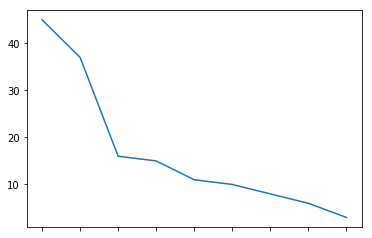

In [6]:
#to suppress <matplotlib.axes._subplots.AxesSubplot at 0x7fef85e9bc18>, just add ; to the end of the line
fo.Sport.value_counts().plot(kind='line');
# you are not able to see the x-axis labels as they are too many to be filled in that small figure

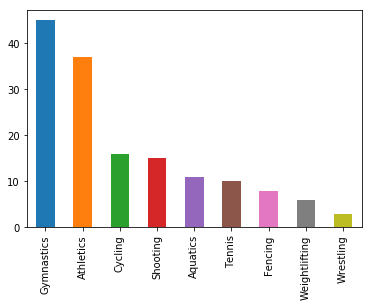

In [7]:
fo.Sport.value_counts().plot(kind='bar');
# here bar plat is a better match than a line plot. It does a better job of displaying labels on x-axis.

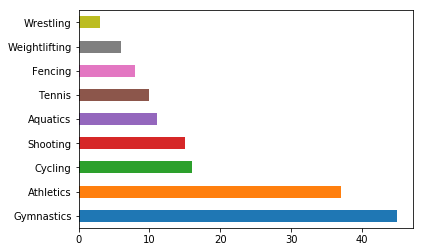

In [8]:
# you can also display horizontal plot
fo.Sport.value_counts().plot(kind='barh');

(-1.1346909902821112,
 1.1016519519181958,
 -1.1013848177275598,
 1.1127941727901305)

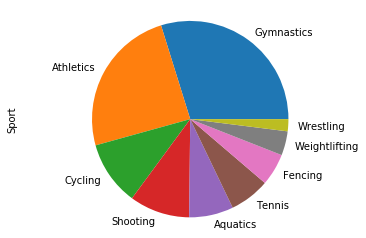

In [9]:
# finally, same info using a pie chart
fo.Sport.value_counts().plot(kind='pie');
plt.axis('equal')

#### Plot colors
- specify using color=''

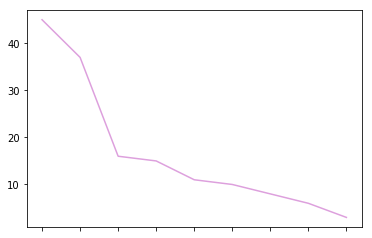

In [10]:
fo.Sport.value_counts().plot(kind='line', color='plum');

### Figure Size
- The figure size is a tuple where you can specify the width and the height in inches.

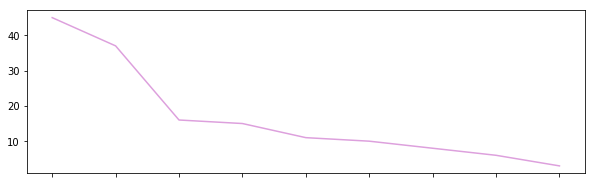

In [11]:
fo.Sport.value_counts().plot(kind='line', color='plum',figsize=(10,3));

### Colormaps
- Colormaps are included with Matplotlib.
- The idea behind choosing a cool colormap, is to find a good representation of your data.
- There are three classes of colormaps. The sequential, the diverging, and the qualitative.
    - The sequential should be used for representing information that has ordering. Here, there is a change in lightness, often over a single hue.
    - Diverging is to be used when the information being plotted deviates around a middle value.
    - the qualitative class is used to represent information which does not have any ordering or relationship, and is often miscellaneous colors.

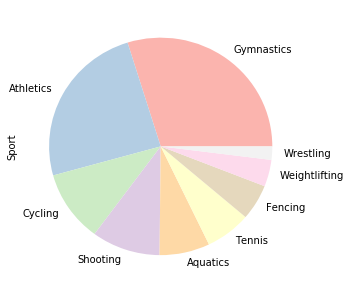

In [12]:
fo.Sport.value_counts().plot(kind='pie',figsize=(5,5),colormap='Pastel1');

### Categorical Variable
- A categorical variable is one that can only take a fixed number of values.
- In the Olympics dataset, we have a couple of examples of categorical variables.
    - There are only a limited number of sports
    - the gender is either male or female
    - medals are gold, silver or bronze

### Seaborn
- Seaborn is a visualization library based on Matplotlib.
- One of the reasons to use Seaborn is that it produces beautiful statistical plots.
- It is very important to realize that Seaborn is a complement and not a substitute to Matplotlib.
- one of the advantages again with using Seaborn is that it works very well with pandas.
- Seaborn has an excellent examples gallery that provides plots on the website, and if you click on any of the plots, it provides the code to generate that plot.
- Seaborn, as with Matplotlib, has methods for bar plots, histograms and pie charts.

### Seaborn VS Matplotlib: So when would you use Seaborn versus Matplotlib?
- Matplotlib: If you're running some small scripts, then Matplotlib with pyplot is easy to use and great for bar charts, pie charts and so on.
- Seaborn: If you're looking to write short scripts to deal with things like categorical data, or more advanced statistical plots, or creating other kinds of plots such as heatmaps, then Seaborn is going to be your choice.

#### We will take a look at countplot() method from seaborn (one of the several methods like barplot() etc). Countplot has very similar parameters to Matplotlib.
- data: The data parameter for countplot is where you provide the DataFrame or the source for the data.
- hue: The hue is for the categorical variables. The hue allows you to specify a categorical variable in a different color.
- order: The order parameter allows you to determine the sequence of the categorical variables.
- palette: the palette parameter allows you to specify colors for the different levels of the hue variable.

In [13]:
import seaborn as sns

#### How many medals have been won by mean an women in the history of the Olympics. How many Gold, Silver and Bronze medals were won for each gender?

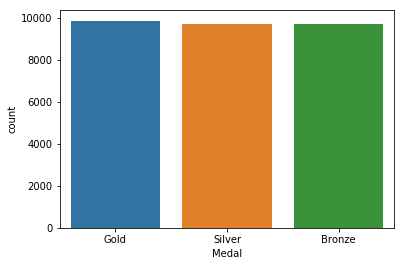

In [14]:
sns.countplot(x='Medal', data=oo);
# we know that we're trying to determine the number of medals, our data source is our DataFrame oo,
# and we can see here that the number of medals won by men and women in the history of the Olympics
# is presented in this plot.

- Now if we wanted to know the number of gold, silver and bronze medals won for each gender, this is where we can use the categorical variable.
- all we need to do here is to add hue equals gender and that will allow us to present the distribution of gold, silver and bronze medals amongst the men and the women.

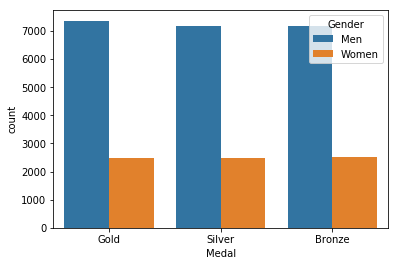

In [15]:
sns.countplot(x='Medal', data=oo, hue='Gender');

#### Challenge:
- Plot the number of medals received by the Chinese Team (men and women) in Beijing 2008 using
    - Matplotlib 
    - Seaborn
- How can you use colormaps to give data more meaning
- Plot the number of bronze silver and gold medals for each gender
- How can you give the data more meaning? Is there anything else you can change to make it more intuitive?

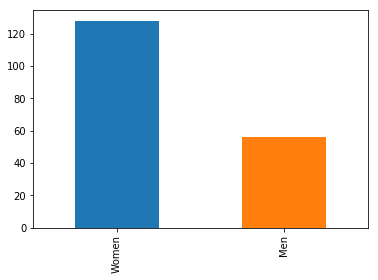

In [16]:
chn = oo[(oo.NOC=='CHN')&(oo.Edition==2008)]
chn.Gender.value_counts().plot(kind='bar');

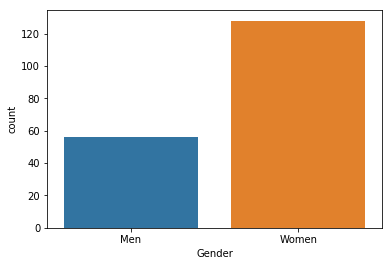

In [17]:
sns.countplot(x='Gender', data=chn);

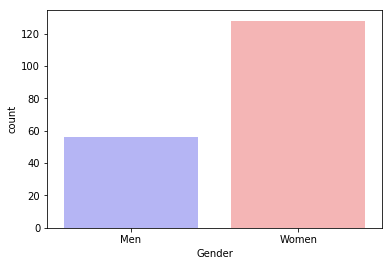

In [18]:
#colormaps
sns.countplot(x='Gender', data=chn, palette='bwr');

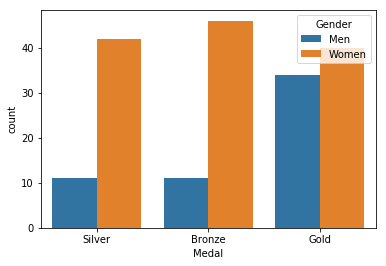

In [19]:
#plot the number of gold, silver and bronze for each gender
sns.countplot(x='Medal', data=chn, hue='Gender');

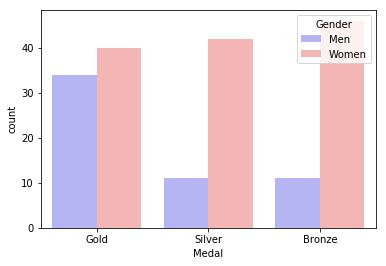

In [20]:
# How can you give the data more meaning? Is there anything else you can change to make it more intuitive?
sns.countplot(x='Medal', data=chn, hue='Gender',palette='bwr',order=['Gold','Silver','Bronze']);
# order : specify the order of the categorical variable in a list
# give the right colormap so that it looks intuitive